ANALISIS EXPLORATORIO DE DATOS (E.D.A)

In [14]:
# importo librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 

In [15]:
# importamos nuestro csv

plataformas = pd.read_csv("Df_completo.csv")

In [16]:
#Visualizo ambos datasets
plataformas.head(2)

,Unnamed: 0,Id,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,platform,duration_int,duration_type,score
0,0,as1,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,amazon,113.0,min,3.467131
1,1,as2,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,amazon,110.0,min,3.548682


In [17]:
# elimino la columna "Unnamed:"  ya que no se usara 

plataformas.drop(columns=['Unnamed: 0'], inplace=True)

In [18]:
#Cambio el nomre de la columna 'listed_in' por 'movies_type'
plataformas = plataformas.rename(columns={'listed_in': 'movies_type'})

In [19]:
# numero de filas y columnas
plataformas.shape 

(22998, 16)

In [20]:
# usuarios unicos 
len(plataformas['Id'].unique())

22998

In [21]:
#Veo los duplicados y los sumamos
plataformas[plataformas.duplicated()], plataformas.duplicated().sum()

(Empty DataFrame
 Columns: [Id, show_id, type, title, director, cast, country, date_added, release_year, rating, movies_type, description, platform, duration_int, duration_type, score]
 Index: [],
 0)

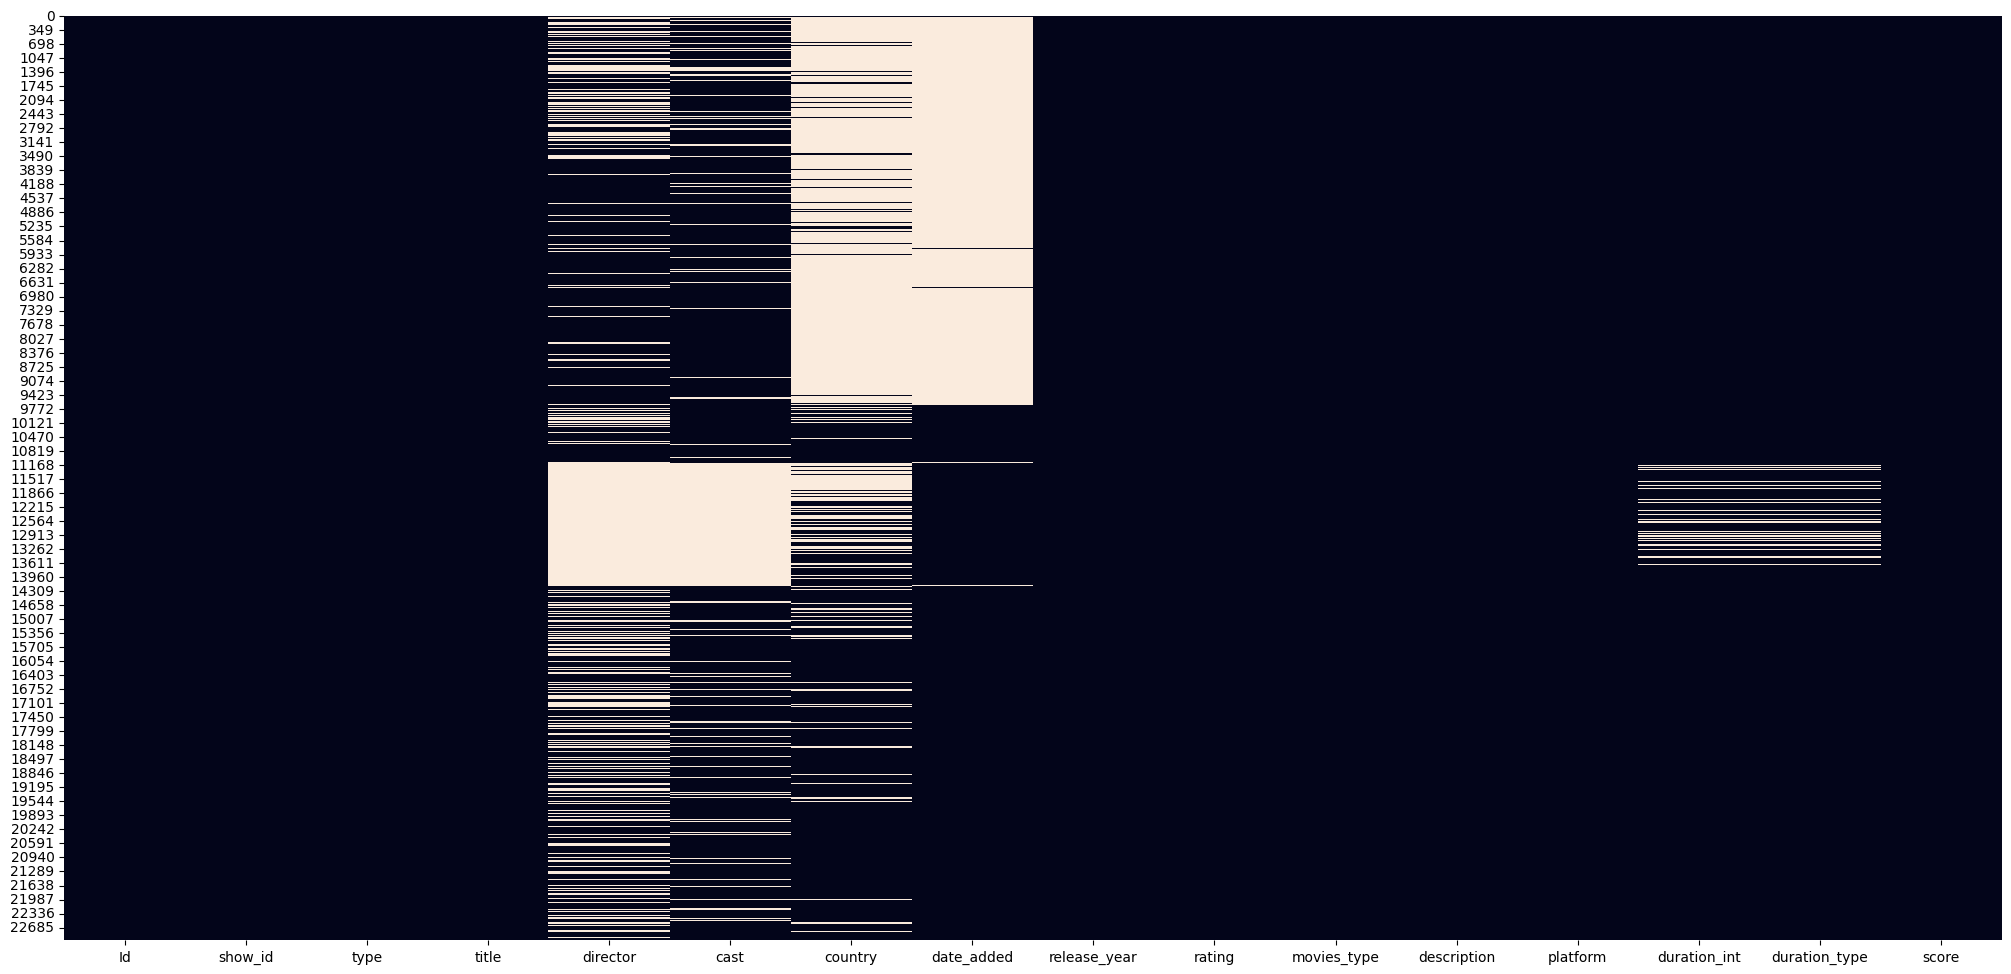

In [22]:
# visualizamos los valores nulos

plt.figure(figsize= (25,12))
sns.heatmap(plataformas.isnull(), cbar=False)
plt.show()

In [23]:
#Vamos a ver la cantidad de nulos por columna asi los cuantificamos
plataformas.isnull().sum().sort_values(ascending=False)

country          11499
date_added        9554
director          8259
cast              5321
duration_int       482
duration_type      482
description          4
Id                   0
show_id              0
type                 0
title                0
release_year         0
rating               0
movies_type          0
platform             0
score                0
dtype: int64

In [24]:
###Hacemos un profiling de los datos 
report = plataformas.profile_report(title='Pandas profiling report ')
report.to_file(output_file="report.html")

Summarize dataset:  74%|███████▍  | 17/23 [00:04<00:00,  8.86it/s, Calculate auto correlation]    C:\Users\alekz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 111.38it/s]


Analisis de columnas 

In [25]:
print('Porcentaje de valores faltantes de la variable country:', (plataformas.country.isnull().sum()/len(plataformas)) * 100)
print('Porcentaje de valores faltantes de la variable date_added:', (plataformas.date_added.isnull().sum()/len(plataformas)) * 100)
print('Porcentaje de valores faltantes de la variable director:', (plataformas.director.isnull().sum()/len(plataformas)) * 100)
print('Porcentaje de valores faltantes de la variable cast:', (plataformas.cast.isnull().sum()/len(plataformas)) * 100)
print('Porcentaje de valores faltantes de la variable duration_int:', (plataformas.duration_int.isnull().sum()/len(plataformas)) * 100)
print('Porcentaje de valores faltantes de la variable duration_type:', (plataformas.duration_type.isnull().sum()/len(plataformas)) * 100)

Porcentaje de valores faltantes de la variable country: 50.0
Porcentaje de valores faltantes de la variable date_added: 41.5427428472041
Porcentaje de valores faltantes de la variable director: 35.91181841899296
Porcentaje de valores faltantes de la variable cast: 23.1367945038699
Porcentaje de valores faltantes de la variable duration_int: 2.0958344203843815
Porcentaje de valores faltantes de la variable duration_type: 2.0958344203843815


columna 1: country

In [26]:
#visualizo los valores y los cuento 

plataformas.country.value_counts()

united states                                                  4997
india                                                          1203
united kingdom                                                  583
japan                                                           515
canada                                                          237
                                                               ... 
lebanon, united arab emirates, france, switzerland, germany       1
france, belgium, italy                                            1
lebanon, united states, united arab emirates                      1
lebanon, france                                                   1
united arab emirates, jordan                                      1
Name: country, Length: 886, dtype: int64

In [27]:
# elimino la columna ya que presenta gran cantidad de valores nulos 
 
plataformas.drop(columns='country', inplace=True)

In [28]:
# verifico
plataformas.head(2)

,Id,show_id,type,title,director,cast,date_added,release_year,rating,movies_type,description,platform,duration_int,duration_type,score
0,as1,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,amazon,113.0,min,3.467131
1,as2,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",2021-03-30,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,amazon,110.0,min,3.548682


Columna 2: date_added

In [29]:
#visualizo los valores y los cuento 

plataformas.date_added.value_counts()

2019-11-12    724
2020-01-01    146
2021-07-01    132
2021-09-01    107
2019-12-31    105
             ... 
2015-12-07      1
2017-11-30      1
2015-11-17      1
2017-12-05      1
2020-01-11      1
Name: date_added, Length: 2003, dtype: int64

In [30]:
# elimino la columna ya que presenta gran cantidad de valores nulos y la informacion que brninda no aporta mucho en la toma de desiciones ya que es un valor poco relevante 
 
plataformas.drop(columns='date_added', inplace=True)

In [31]:
# verifico
plataformas.head(2)

,Id,show_id,type,title,director,cast,release_year,rating,movies_type,description,platform,duration_int,duration_type,score
0,as1,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",2014,g,"comedy, drama",a small fishing village must procure a local d...,amazon,113.0,min,3.467131
1,as2,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,amazon,110.0,min,3.548682


Columna 3: director

In [32]:
#visualizo los valores y los cuento 

plataformas.director.value_counts()

mark knight              113
cannis holder             61
jay chapman               46
moonbug entertainment     37
arthur van merwijk        30
                        ... 
charles wilkinson          1
dominic brunt              1
sean breathnach            1
cindy jansen               1
mozez singh                1
Name: director, Length: 10094, dtype: int64

In [33]:
# aunuqe presenta un gran numero de datos faltantes es una columna importante ya que brinda un dato importante 
# pero en nuestro modelo de recomendacion no lo usaremos 

plataformas.drop(columns='director', inplace=True)

In [34]:
#visualizo
plataformas.head(1)

,Id,show_id,type,title,cast,release_year,rating,movies_type,description,platform,duration_int,duration_type,score
0,as1,s1,movie,the grand seduction,"brendan gleeson, taylor kitsch, gordon pinsent",2014,g,"comedy, drama",a small fishing village must procure a local d...,amazon,113.0,min,3.467131


Columna 4: cast

In [35]:
#visualizo los valores y los cuento 

plataformas.cast.value_counts()

maggie binkley                                                                                                                           56
1                                                                                                                                        34
anne-marie newland                                                                                                                       24
david attenborough                                                                                                                       22
cassandra peterson                                                                                                                       21
                                                                                                                                         ..
charl washington, coke horner, trina chatfield, jessie a., deborah chenault green                                                         1
dana ciobanu, mircea

In [36]:
# aunuqe presenta un gran numero de datos faltantes es una columna importante ya que brinda un dato importante  
# en nuestro modelo de recomendacion no la usaremos por tanto la eliminare

plataformas.drop(columns='cast', inplace=True)

In [37]:
plataformas.head(1)

,Id,show_id,type,title,release_year,rating,movies_type,description,platform,duration_int,duration_type,score
0,as1,s1,movie,the grand seduction,2014,g,"comedy, drama",a small fishing village must procure a local d...,amazon,113.0,min,3.467131


Columna 5: duration_int

In [38]:
#visualizo los valores y los cuento 

plataformas.duration_int.value_counts()

1.0      4194
2.0      1016
3.0       487
90.0      429
91.0      419
         ... 
479.0       1
601.0       1
485.0       1
550.0       1
201.0       1
Name: duration_int, Length: 225, dtype: int64

In [39]:
# elimino la columna ya que no brinda datos aportantes para la toma de desiciones en nuestro modelo de recomendacion 
 
plataformas.drop(columns='duration_int', inplace=True)

In [40]:
#visualizo
plataformas.head(2)

,Id,show_id,type,title,release_year,rating,movies_type,description,platform,duration_type,score
0,as1,s1,movie,the grand seduction,2014,g,"comedy, drama",a small fishing village must procure a local d...,amazon,min,3.467131
1,as2,s2,movie,take care good night,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,amazon,min,3.548682


columna 6: duration_type

In [41]:
#visualizo los valores y los cuento 

plataformas.duration_type.value_counts()

min       15999
season     6517
Name: duration_type, dtype: int64

In [42]:
# elimino la columna ya que no brinda datos aportantes para la toma de desiciones 
 
plataformas.drop(columns='duration_type', inplace=True)

In [43]:
#visualizo
plataformas.head(2)

,Id,show_id,type,title,release_year,rating,movies_type,description,platform,score
0,as1,s1,movie,the grand seduction,2014,g,"comedy, drama",a small fishing village must procure a local d...,amazon,3.467131
1,as2,s2,movie,take care good night,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,amazon,3.548682


columna 7: release_year

In [44]:
#visualizo los valores y los cuento 

plataformas.release_year.value_counts()

2019    2470
2020    2406
2021    2385
2018    2105
2017    1892
        ... 
1923       2
1922       2
1924       1
1927       1
1928       1
Name: release_year, Length: 101, dtype: int64

In [45]:
# elimino la columna ya que no brinda datos aportantes para la toma de desiciones 
 
plataformas.drop(columns='release_year', inplace=True)

In [46]:
# verifico

plataformas.head(2)

,Id,show_id,type,title,rating,movies_type,description,platform,score
0,as1,s1,movie,the grand seduction,g,"comedy, drama",a small fishing village must procure a local d...,amazon,3.467131
1,as2,s2,movie,take care good night,13+,"drama, international",a metro family decides to fight a cyber crimin...,amazon,3.548682


columna 8: show_id

In [47]:
#visualizo los valores y los cuento 

plataformas.show_id.value_counts()

s1       4
s975     4
s973     4
s972     4
s971     4
        ..
s9097    1
s9098    1
s9099    1
s9100    1
s9668    1
Name: show_id, Length: 9668, dtype: int64

In [48]:
# elimino la columna ya que no brinda datos aportantes para la toma de desiciones 
 
plataformas.drop(columns='show_id', inplace=True)

In [49]:
# verifico

plataformas.head(2)

,Id,type,title,rating,movies_type,description,platform,score
0,as1,movie,the grand seduction,g,"comedy, drama",a small fishing village must procure a local d...,amazon,3.467131
1,as2,movie,take care good night,13+,"drama, international",a metro family decides to fight a cyber crimin...,amazon,3.548682


Column 10: platform

In [50]:
#visualizo los valores y los cuento 

plataformas.platform.value_counts()

amazon     9668
netflix    8807
hulu       3073
disney     1450
Name: platform, dtype: int64

In [51]:
# elimino la columna ya que no brinda datos aportantes para la toma de desiciones 
 
plataformas.drop(columns='platform', inplace=True)

In [52]:
# verifico

plataformas.head(2)

,Id,type,title,rating,movies_type,description,score
0,as1,movie,the grand seduction,g,"comedy, drama",a small fishing village must procure a local d...,3.467131
1,as2,movie,take care good night,13+,"drama, international",a metro family decides to fight a cyber crimin...,3.548682


Column 11: type

In [53]:
#visualizo los valores y los cuento 

plataformas.type.value_counts()

movie      16481
tv show     6517
Name: type, dtype: int64

In [54]:
# elimino la columna ya que no brinda datos aportantes para la toma de desiciones 
 
plataformas.drop(columns='type', inplace=True)

In [55]:
# verifico

plataformas.head(2)

,Id,title,rating,movies_type,description,score
0,as1,the grand seduction,g,"comedy, drama",a small fishing village must procure a local d...,3.467131
1,as2,take care good night,13+,"drama, international",a metro family decides to fight a cyber crimin...,3.548682


Columna 12: description

In [56]:
#visualizo los valores y los cuento 

plataformas.description.value_counts()

arpo was designed as a commando robot, built as a fierce fighting machine. but, with world peace achieved arpo has been re-equipped for caregiving, re-coded for cuddling, and officially reassigned as a nanny robot! arpo helps children age 4-8 build an understanding of non-verbal communication like body language and facial expressions. enjoy arpo's hilarious, slapstick funny cartoons for kids!    15
1                                                                                                                                                                                                                                                                                                                                                                                                              15
a new collection of colorful and wonderfully engaging nursery rhymes and children's songs that will thrill your child while educating them in their numbers, abcs and general learning! from the cre

In [57]:
# elimino la columna ya que no brinda datos aportantes para la toma de desiciones 
 
plataformas.drop(columns='description', inplace=True)

In [58]:
# verificamos 

plataformas.isnull().sum().sort_values(ascending=False)

Id             0
title          0
rating         0
movies_type    0
score          0
dtype: int64

In [59]:
plataformas.head(2)


,Id,title,rating,movies_type,score
0,as1,the grand seduction,g,"comedy, drama",3.467131
1,as2,take care good night,13+,"drama, international",3.548682


Columna 13 Score

In [60]:
#visualizo los valores y los cuento 

plataformas.score.value_counts()

3.500000    171
3.571429     24
3.562500     22
3.555556     21
3.583333     19
           ... 
3.468421      1
3.452519      1
3.466270      1
3.498853      1
3.515947      1
Name: score, Length: 11383, dtype: int64

In [61]:
# Evaluo valores: max, min y promedio de 'score'
print('Valor promedio =',plataformas.score.mean())
print('Valor maximo =',plataformas.score.max())
print('Valor minimo =',plataformas.score.min())

Valor promedio = 3.5334429843061685
Valor maximo = 3.7245119305856833
Valor minimo = 3.336477987421384


In [62]:
# Usuarios y scores únicos:
n_users = plataformas.Id.unique().shape[0]
n_scores = plataformas.score.unique().shape[0]
print (str(n_users) + '  usuarios')
print (str(n_scores) + '  scores')

22998  usuarios
11383  scores


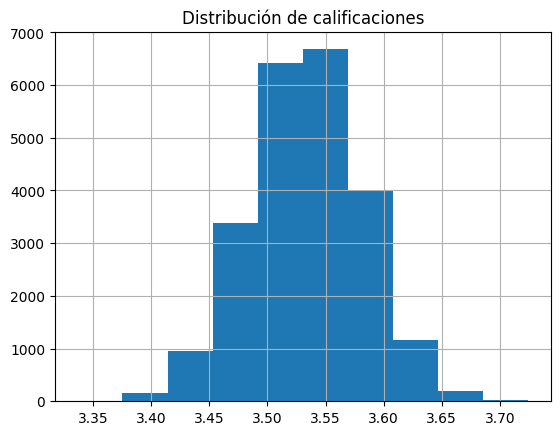

In [63]:
# Observo la distribución de las calificaciones
plataformas['score'].hist()
plt.title('Distribución de calificaciones')
plt.show()

Conclusiones 

- el primer filtro que hacemos para determinar si una columna nos brinda una informacion valiosa o si se puede utilizar en los datos es en la cantidad de ceros que esta tiene ya que si es mayor a un 50% estas columnas deberan ser eliminadas ya que no va brindar un informacion que sea muy aportante en la toma de desiciones.
- es importente aclarar que cada columan debe ser analisada por separado ya que cada una puede tener un peso completamente diferente en la toma de decisiones. aun sin importar que esta tenga datos faltantes ya que dentro del criterio que se quiera evaluar va ser de gran importancia 

In [64]:
#Corroboro los valores nulos

plataformas.isnull().sum().sort_values(ascending=False)

Id             0
title          0
rating         0
movies_type    0
score          0
dtype: int64

In [65]:
#Vamos a guardar este último dataset con el cual se va a trabajar en el modelo DE ML

plataformas.to_csv('plataformas.csv', index = False)